In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import main
sns.set(rc={'figure.figsize':(18, 9)}, style="whitegrid", color_codes=True)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = main.get_data()

#### INITIAL STEPS
1. Missing values
2. Check data types of each column and check distributions in categorical columns
3. Check correlation between columns

<AxesSubplot:>

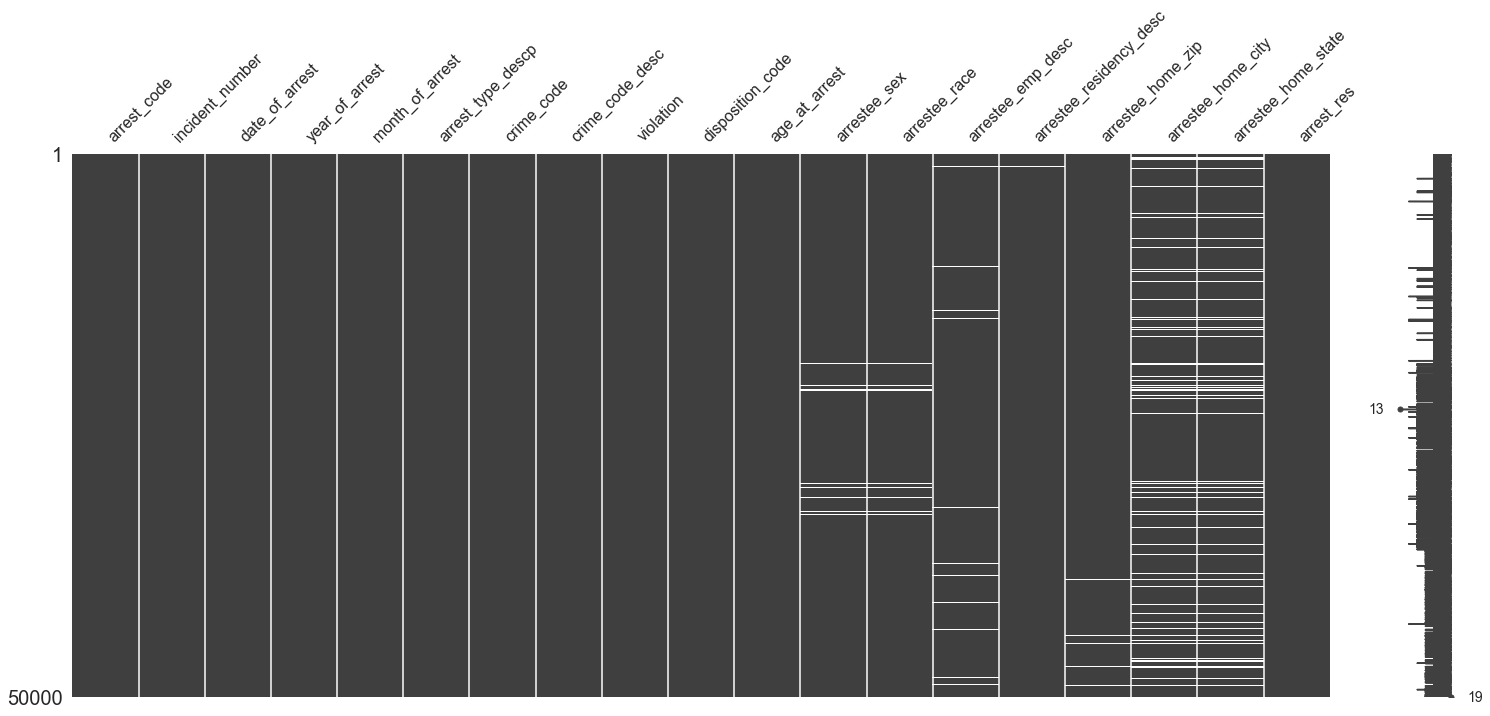

In [19]:
mn.matrix(data)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>We can see from the above plot that there are not many missing values in the dataset, only a few columns (ARREST TYPE DESCRIPTION/ARRESTEE EMPLOYMENT DESCRIPTION/ARRESTEE RESIDENCY DESCRIPTION) have significant missing values. Let us confirm this with the help of isna() function. Also, Conspiracy Code column has completely missing values.
    </span>    
</div>

In [20]:
data.isna().sum()*100/len(data)

arrest_code                0.000
incident_number            0.000
date_of_arrest             0.000
year_of_arrest             0.000
month_of_arrest            0.000
arrest_type_descp          0.016
crime_code                 0.000
crime_code_desc            0.000
violation                  0.000
disposition_code           0.000
age_at_arrest              0.000
arrestee_sex               1.368
arrestee_race              1.368
arrestee_emp_desc          3.276
arrestee_residency_desc    0.378
arrestee_home_zip          0.676
arrestee_home_city         9.810
arrestee_home_state        9.918
arrest_res                 0.000
dtype: float64

In [21]:
data.dtypes

arrest_code                object
incident_number            object
date_of_arrest             object
year_of_arrest             object
month_of_arrest            object
arrest_type_descp          object
crime_code                 object
crime_code_desc            object
violation                  object
disposition_code           object
age_at_arrest              object
arrestee_sex               object
arrestee_race              object
arrestee_emp_desc          object
arrestee_residency_desc    object
arrestee_home_zip          object
arrestee_home_city         object
arrestee_home_state        object
arrest_res                 object
dtype: object

In [22]:
# convert data types to appropriate types
data['crime_code'] = data['crime_code'].astype('int32')
data['age_at_arrest'] = data['age_at_arrest'].astype('float')

data['arrest_type_descp'] = data['arrest_type_descp'].astype('category')

data['year_of_arrest'] = data['year_of_arrest'].astype('int32')
data['month_of_arrest'] = data['month_of_arrest'].astype('int32')
data['date_of_arrest'] = pd.to_datetime(data['date_of_arrest'])

In [23]:
data.describe()

,year_of_arrest,month_of_arrest,crime_code,age_at_arrest
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,2016.699720,6.524480,4285.339520,31.850680
std,2.717613,3.360962,2598.279465,14.675282
min,2012.000000,1.000000,110.000000,-1.000000
25%,2014.000000,4.000000,2415.000000,22.000000
50%,2016.000000,7.000000,4751.000000,28.000000
75%,2019.000000,9.000000,6608.000000,40.000000
max,2022.000000,12.000000,9995.000000,99.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b> <br>AGE AT ARREST has negative values which have to be removed before visualizations. Year and Month are both float type columns. We also have a separate date column. We can drop the 'MONTH OF ARREST' column and convert the 'YEAR OF ARREST' into datetime format. 
    </span>    
</div>

In [24]:
# check distribution of AGE OF ARREST
data = data[data['age_at_arrest'] > 0]

<AxesSubplot:>

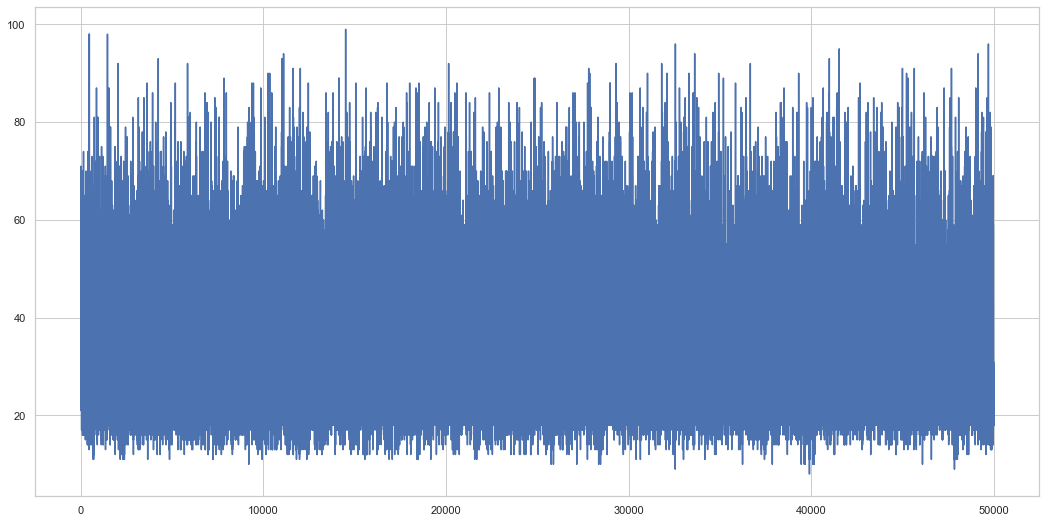

In [25]:
data['age_at_arrest'].plot()

In [26]:
# Finding the max age to make bins
data['age_at_arrest'].astype(float).max()

99.0

### Number of Arrests by Sex

In [27]:
data = data.loc[data['arrestee_sex'].isin(['MALE', 'FEMALE'])]

In [31]:
main.arrests_by_sex(data)

In [33]:
main.arrests_by_race(data)